In [1]:
import os

In [2]:
# check if already in right local directory
# otherwise clone the repo from github and change directory

cwd = os.getcwd()
print(os.path.split(cwd))

if not os.path.split(cwd)[1] == "MA":
    !git clone https://www.github.com/JohnnyNewman/MA.git
    os.chdir('MA')

('C:\\Users\\Nils\\Workspace\\MA_git', 'MA')


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.decomposition import PCA
import pickle

### First, load the data:

In [4]:
dv_list = pickle.load(open("save/T006/dv_list.p", "rb"))
df_result = pd.read_excel("save/T006/df_result.xlsx")
df_cd_grad = pd.read_excel("save/T006/df_cd_grad.xlsx")


In [5]:
df_result #, df_result.shape

,Unnamed: 0,DIR,c_L,c_D,rms_rho,rms_nu,AOA
0,0,T006 DSN_000,0.712967,0.060632,-4.977940,-5.366283,5.622905
1,1,T006 DSN_001,0.724184,0.018179,-6.424451,-8.215098,3.673885
2,2,T006 DSN_002,0.724241,0.012951,-6.452422,-8.123596,1.245573
3,3,T006 DSN_003,0.724184,0.018523,-6.395492,-8.374623,2.102441
4,4,T006 DSN_004,0.724207,0.013087,-6.535674,-8.658059,2.780464
...,...,...,...,...,...,...,...
995,995,T006 DSN_995,0.723134,0.030137,-6.175512,-6.857003,2.950256
996,996,T006 DSN_996,0.724201,0.018668,-6.426329,-8.284552,2.422116
997,997,T006 DSN_997,0.724063,0.027954,-6.543067,-7.889432,2.725608
998,998,T006 DSN_998,0.724212,0.022010,-6.407270,-8.054449,2.908295


In [6]:
N = df_result.shape[0]

In [7]:
df_cd_grad

,Unnamed: 0,VAR,CD_GRAD,STEP,DIR
0,0,0,0.761449,0.001,T006 DSN_000
1,1,1,0.753202,0.001,T006 DSN_000
2,2,2,0.645545,0.001,T006 DSN_000
3,3,3,0.502804,0.001,T006 DSN_000
4,4,4,0.356495,0.001,T006 DSN_000
...,...,...,...,...,...
37995,33,33,-0.448886,0.001,T006 DSN_999
37996,34,34,-0.264682,0.001,T006 DSN_999
37997,35,35,-0.084116,0.001,T006 DSN_999
37998,36,36,0.204847,0.001,T006 DSN_999


### Then the non-converged results (rms_rho < -6) are removed from the dataset:

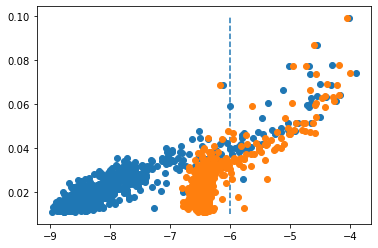

In [8]:
plt.plot(df_result["rms_nu"], df_result["c_D"], "o", label="nu")
plt.plot(df_result["rms_rho"], df_result["c_D"], "o")
plt.vlines([-6], 0.01, 0.1, ls="--")

In [9]:
sim_converged = df_result["rms_rho"] < -6

dv_mat = np.asarray(dv_list)[sim_converged]
c_D = df_result["c_D"].values[sim_converged]
d_CD = np.resize(df_cd_grad["CD_GRAD"].values, ((N, 38)))[sim_converged]

In [10]:
d_CD

array([[ 0.621198 ,  0.638195 ,  0.582739 , ..., -0.0946435,  0.303852 ,
        -0.0358609],
       [ 1.02982  ,  0.972347 ,  0.787893 , ..., -0.0362501, -0.0067322,
        -0.0577502],
       [ 1.17377  ,  1.13068  ,  0.952909 , ..., -0.0334564,  0.157533 ,
         0.0435074],
       ...,
       [ 1.18327  ,  1.17908  ,  1.03277  , ..., -0.210642 ,  0.105212 ,
         0.834902 ],
       [ 0.951534 ,  0.914583 ,  0.754744 , ..., -0.293871 , -0.182783 ,
        -0.0751327],
       [ 1.1175   ,  1.07552  ,  0.900379 , ..., -0.0841159,  0.204847 ,
         0.806494 ]])

In [11]:
d_CD.shape[0]

924

### Calculation of the covariance matrix and eigenvalue decomposition:

In [80]:
C = np.zeros((38,38))
for i in range(d_CD.shape[0]):
    C += np.outer(d_CD[i], d_CD[i])
C = C / d_CD.shape[0]

In [81]:
i = 0
np.outer(d_CD[i], d_CD[i]), d_CD[i]*d_CD[0,i]

(array([[ 0.38588696,  0.39644546,  0.3619963 , ..., -0.05879235,
          0.18875225, -0.02227672],
        [ 0.39644546,  0.40729286,  0.37190112, ..., -0.06040101,
          0.19391683, -0.02288625],
        [ 0.3619963 ,  0.37190112,  0.33958474, ..., -0.05515246,
          0.17706641, -0.02089755],
        ...,
        [-0.05879235, -0.06040101, -0.05515246, ...,  0.00895739,
         -0.02875762,  0.003394  ],
        [ 0.18875225,  0.19391683,  0.17706641, ..., -0.02875762,
          0.09232604, -0.01089641],
        [-0.02227672, -0.02288625, -0.02089755, ...,  0.003394  ,
         -0.01089641,  0.001286  ]]),
 array([ 0.38588696,  0.39644546,  0.3619963 ,  0.31247129,  0.26217227,
         0.2192568 ,  0.18811925,  0.17037225,  0.16553125,  0.17172398,
         0.18643208,  0.20713909,  0.23156522,  0.25692687,  0.27682074,
         0.27162628,  0.17839937, -0.20597994, -1.41561706,  4.11382785,
         3.66693801,  2.87701642,  2.01840897,  1.20559002,  0.49782497,
        

In [14]:
### Bishop 2006 PRML p. 83
d_CD_mean = d_CD.mean(axis=0)
np.outer(d_CD_mean, d_CD_mean)[:2,:3], d_CD_mean[0]*d_CD_mean[0], d_CD_mean[0]*d_CD_mean[1], d_CD_mean[1]*d_CD_mean[2]

(array([[0.97315565, 0.9517748 , 0.8087411 ],
        [0.9517748 , 0.93086371, 0.79097255]]),
 0.9731556467110306,
 0.9517748023024036,
 0.7909725452580179)

In [89]:
d_CD_mean

array([ 9.86486516e-01,  9.64812784e-01,  8.19819719e-01,  6.34639355e-01,
        4.49469746e-01,  2.87190260e-01,  1.59836398e-01,  7.13345754e-02,
        1.95017368e-02, -1.90527935e-03, -1.04513224e-03,  1.39191743e-02,
        3.59689089e-02,  5.89989018e-02,  7.53746153e-02,  6.92051951e-02,
       -1.97764085e-03, -2.64318326e-01, -1.12017764e+00,  3.53801868e+00,
        3.30605245e+00,  2.76209467e+00,  2.13110599e+00,  1.50945220e+00,
        9.47519637e-01,  4.70238986e-01,  8.60121402e-02, -2.06886347e-01,
       -4.14592598e-01, -5.43134137e-01, -5.96537147e-01, -5.78759945e-01,
       -4.98787211e-01, -3.74542431e-01, -2.27646371e-01, -6.51526715e-02,
        1.32341719e-01,  3.76482275e-01])

In [15]:
#C = C - d_CD_mean

In [16]:
d_CD[i].reshape(1, -1).T @ d_CD[i].reshape(1, -1) - np.outer(d_CD[i], d_CD[i])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
C = np.dot(d_CD.T, d_CD) / d_CD.shape[0]

In [83]:
n_samples = d_CD.shape[0]

In [19]:
C.shape

(38, 38)

In [20]:
#covariance.shape

NameError: name 'covariance' is not defined

In [27]:
from scipy.linalg import svd

In [28]:
U, S, Vt = linalg.svd(C)

In [88]:
U[:,0]

array([-0.09546604, -0.09707783, -0.0865084 , -0.07157038, -0.05614313,
       -0.04251905, -0.03197743, -0.0250159 , -0.02152232, -0.02096126,
       -0.02257665, -0.02556765, -0.02916024, -0.03245446, -0.03381973,
       -0.02921547, -0.00732753,  0.06633861,  0.30929228, -0.50750414,
       -0.48139942, -0.40695831, -0.31799235, -0.22926729, -0.14861798,
       -0.08006787, -0.0252182 ,  0.01581324,  0.04366366,  0.05927555,
        0.06385514,  0.05924511,  0.0483919 ,  0.03515412,  0.02261125,
        0.01031481, -0.00629644, -0.03056968])

In [90]:
U.shape

(38, 38)

In [91]:
np.ones(3)

array([1., 1., 1.])

In [87]:
W[:,0]

array([-0.09546604, -0.09707783, -0.0865084 , -0.07157038, -0.05614313,
       -0.04251905, -0.03197743, -0.0250159 , -0.02152232, -0.02096126,
       -0.02257665, -0.02556765, -0.02916024, -0.03245446, -0.03381973,
       -0.02921547, -0.00732753,  0.06633861,  0.30929228, -0.50750414,
       -0.48139942, -0.40695831, -0.31799235, -0.22926729, -0.14861798,
       -0.08006787, -0.0252182 ,  0.01581324,  0.04366366,  0.05927555,
        0.06385514,  0.05924511,  0.0483919 ,  0.03515412,  0.02261125,
        0.01031481, -0.00629644, -0.03056968])

In [ ]:
### from sklearn PCA:
### # Center data
### self.mean_ = np.mean(X, axis=0)
### X -= self.mean_

In [32]:
        
explained_variance_ = (S ** 2) / (n_samples - 1)
total_var = explained_variance_.sum()
explained_variance_ratio_ = explained_variance_ / total_var
singular_values_ = S.copy()  # Store the singular values.

In [33]:
explained_variance_ratio_.cumsum()

array([0.99086127, 0.99711461, 0.99973701, 0.99990894, 0.99997262,
       0.99999132, 0.99999721, 0.99999915, 0.99999982, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [85]:
S, l

(array([1.05124173e+02, 8.35126770e+00, 5.40810283e+00, 1.38478176e+00,
        8.42755820e-01, 4.56642713e-01, 2.56353998e-01, 1.46955548e-01,
        8.66549036e-02, 4.24823724e-02, 1.06154621e-02, 7.45814961e-03,
        1.81546505e-03, 1.45260839e-03, 5.43181370e-04, 3.36978152e-04,
        1.22713977e-04, 4.77765428e-05, 2.33688471e-05, 4.77487144e-06,
        3.84064691e-06, 3.93886201e-07, 3.16198360e-07, 2.30845998e-08,
        1.82114847e-08, 1.53895990e-09, 8.73897942e-10, 8.71533727e-11,
        3.17045675e-11, 5.80831623e-12, 3.67315436e-12, 2.59764101e-12,
        1.89677177e-12, 5.78722316e-13, 2.24348808e-13, 1.35064087e-13,
        7.39979487e-14, 6.12947202e-14]),
 array([1.05124173e+02, 8.35126770e+00, 5.40810283e+00, 1.38478176e+00,
        8.42755820e-01, 4.56642713e-01, 2.56353998e-01, 1.46955548e-01,
        8.66549036e-02, 4.24823724e-02, 1.06154621e-02, 7.45814961e-03,
        1.81546505e-03, 1.45260839e-03, 5.43181370e-04, 3.36978152e-04,
        1.22713977e-04

[0.00107236 0.00107913 0.00108197 0.00108215 0.00108222 0.00108224
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225 0.00108225
 0.00108225 0.00108225]
[1.07236068e-03 6.76769077e-06 2.83808617e-06 1.86079429e-07
 6.89190396e-08 2.02343268e-08 6.37699219e-09 2.09559653e-09
 7.28655055e-10 1.75127045e-10 1.09348670e-11 5.39756496e-12
 3.19824316e-13 2.04754187e-13 2.86302690e-14 1.10189239e-14
 1.46124742e-15 2.21495617e-16 5.29919949e-17 2.21237663e-18
 1.43134545e-18 1.50548775e-20 9.70185811e-21 5.17106873e-23
 3.21829916e-23 2.29820097e-25 7.41068073e-26 7.37037423e-28
 9.75468779e-29 3.27448081e-30 1.30915859e-30 6.54592352e-31
 3.49125181e-31 3.25562811e-32 4.79190942e-33 3.61354701e-34
 5.34448154e-34 1.7485284

<ipython-input-36-8b8e67861826>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  l = l.astype("double")


Text(0, 0.5, 'Cum. Fraction of Total EV')

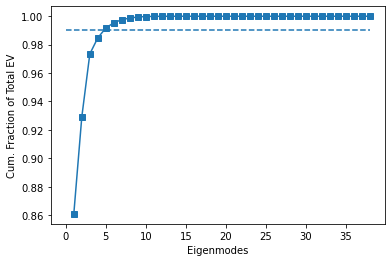

In [36]:
l, W = linalg.eig(C)
l = l.astype("double")

#explained_variance_ = (S ** 2) / (n_samples - 1)
#total_var = explained_variance_.sum()
#explained_variance_ratio_ = explained_variance_ / total_var

#print(l.cumsum() / l.sum())
print(np.cumsum(l**2) / np.sum(l**2) / n_samples)
print((l**2) / np.sum(l**2) / n_samples)

plt.plot(range(1,39), l.cumsum() / l.sum(), "-s")
plt.hlines([0.99], 0, 38, ls="--")
plt.gca().set_xlabel("Eigenmodes")
plt.gca().set_ylabel("Cum. Fraction of Total EV")

In [79]:
l

array([1.05124173e+02, 8.35126770e+00, 5.40810283e+00, 1.38478176e+00,
       8.42755820e-01, 4.56642713e-01, 2.56353998e-01, 1.46955548e-01,
       8.66549036e-02, 4.24823724e-02, 1.06154621e-02, 7.45814961e-03,
       1.81546505e-03, 1.45260839e-03, 5.43181370e-04, 3.36978152e-04,
       1.22713977e-04, 4.77765428e-05, 2.33688471e-05, 4.77487144e-06,
       3.84064691e-06, 3.93886200e-07, 3.16198359e-07, 2.30845975e-08,
       1.82114849e-08, 1.53895582e-09, 8.73898922e-10, 8.71519125e-11,
       3.17058090e-11, 5.80902676e-12, 3.67306220e-12, 2.59727309e-12,
       1.89680523e-12, 5.79227999e-13, 2.22221693e-13, 6.10237661e-14,
       7.42138467e-14, 1.34235845e-13])

In [92]:
W == W.T

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

### Transformation of the design variables into the active subspace (dv_mat --> Y):

In [57]:
Y = np.dot(W[:r,:], dv_mat.T).T
Y.shape, dv_mat.shape

((924, 5), (924, 38))

In [ ]:
Y = np.dot(W[:,:r], dv_mat.T).T
Y.shape, dv_mat.shape

In [70]:
Y = dv_mat @ W[:,:r]
Y.shape, dv_mat.shape

((924, 5), (924, 38))

In [40]:
#Y = dv_mat @ pca.components_.T

In [42]:
np.dot(W[0,:], dv_mat.T).T

array([-3.57798849e-05,  7.55386255e-06, -1.58522348e-05,  2.29641919e-05,
        2.83399202e-06,  6.29546024e-06,  1.15889584e-05, -1.89357615e-05,
       -7.97946180e-07,  6.20493204e-06,  3.67646024e-05,  9.29272697e-06,
       -4.12038512e-05, -1.07899635e-05,  6.33212858e-06, -4.44794855e-05,
       -1.59340947e-05, -2.02008215e-05,  1.63239444e-05, -2.80301867e-07,
       -3.19482004e-05,  6.04267116e-06,  2.94674244e-05,  2.98058913e-05,
       -6.63341163e-05,  7.94809159e-05, -4.39730945e-05,  3.53174802e-05,
       -4.00718685e-06,  2.55784420e-05, -6.36898312e-05,  1.12183533e-05,
       -1.13587346e-05, -7.92783774e-06, -1.06950540e-05,  3.60656078e-05,
       -1.02340995e-05, -1.53518144e-05, -1.64628212e-05,  4.40428427e-05,
       -3.43215098e-06, -2.92822235e-05, -1.82224024e-05, -3.84845358e-06,
        3.41462062e-05, -1.30759495e-05,  6.38603645e-08, -4.91691771e-06,
       -3.43622650e-05,  9.47525755e-06, -1.99033103e-05, -1.33827764e-07,
       -1.12128290e-05,  

In [43]:
np.dot(dv_mat, W[0:10].T)

array([[-3.57798849e-05, -3.71471522e-05,  3.18894965e-05, ...,
        -1.57877541e-05, -2.99180661e-05,  4.05376052e-05],
       [ 7.55386255e-06,  1.70119001e-05, -1.77518263e-05, ...,
         2.72729001e-05,  1.74399513e-05, -7.98319922e-06],
       [-1.58522348e-05,  6.52453155e-06,  8.02914602e-06, ...,
        -3.99520188e-06,  1.98178640e-05, -1.10569894e-06],
       ...,
       [ 1.88020129e-05,  2.59261545e-05, -3.31937245e-06, ...,
        -2.98145131e-05,  5.30746397e-05,  2.95831119e-05],
       [-2.72595559e-06, -8.36697792e-07, -7.43563463e-06, ...,
         5.99920947e-05, -2.10922153e-05, -2.06389798e-05],
       [-1.83024937e-05,  3.24977133e-05, -4.11729822e-05, ...,
         3.57941899e-05,  4.33504374e-05, -3.89988234e-05]])

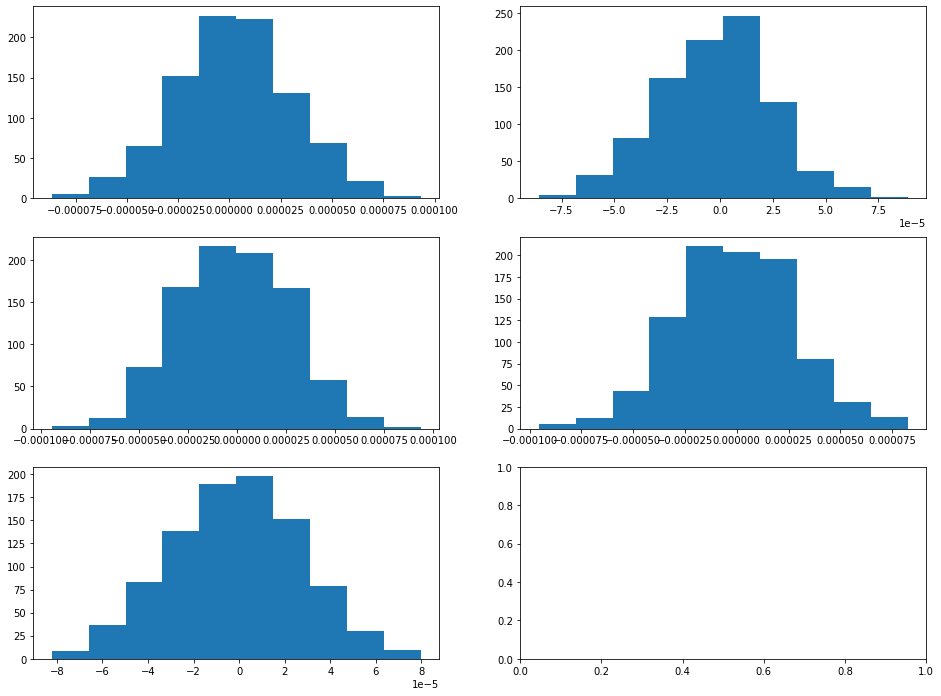

In [78]:
dimx = 2
dimy = int(np.ceil(r / dimx))


fig, axes = plt.subplots(dimy, dimx, figsize=(16, dimy*4))

#plt.gca().invert_yaxis()

for k, ax in enumerate(axes.flat):
    if k < r:
        ax.hist(Y[:,k])

In [ ]:
#plt.hist(Y2[:,1])

In [ ]:
#pca.singular_values_

### Split data into train and test sets:
 (Arguably, this should be done before the unsupervised learning part/PCA)

In [59]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(Y, c_D, test_size=0.2, random_state=3)


### Fit a GaussianProcessRegressor to the training data and evaluate for train and test data:

In [73]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


In [47]:
ls = length_scale = [1.e-05]*r
ls

[1e-05, 1e-05, 1e-05, 1e-05, 1e-05]

In [74]:
ls = 1. / l
ls = ls[:r]
ls

array([0.00951256, 0.1197423 , 0.18490773, 0.72213545, 1.18658332])

#### Unfortunately, the GPR is very sensitive to the choice of kernel

In [53]:
kernel = Matern(length_scale=ls, nu=1.5) +  WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-04))

In [ ]:
#kernel = RBF(length_scale=ls) + Matern(length_scale=ls, nu=1.5) #+ WhiteKernel() #+ RBF()

In [51]:
kernel = RBF() + WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-04))# + ConstantKernel()

In [94]:
kernel = RBF(length_scale=ls, length_scale_bounds=(1e-09, 1e04)) + WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-01))# + ConstantKernel()

In [95]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=25, normalize_y=False)
gp.fit(x_train, y_train)
print(gp.kernel_)
print(gp.score(x_train, y_train))
print(gp.score(x_test, y_test))
print(gp.log_marginal_likelihood())

RBF(length_scale=[0.00078, 0.000508, 0.00104, 0.00122, 0.000842]) + WhiteKernel(noise_level=1.05e-05)
0.7457016943745134
0.611496379728496
3116.368694861562


### Plot the prediction result of the GPR for training and test data:

Text(0.5, 1.0, 'Validation Data')

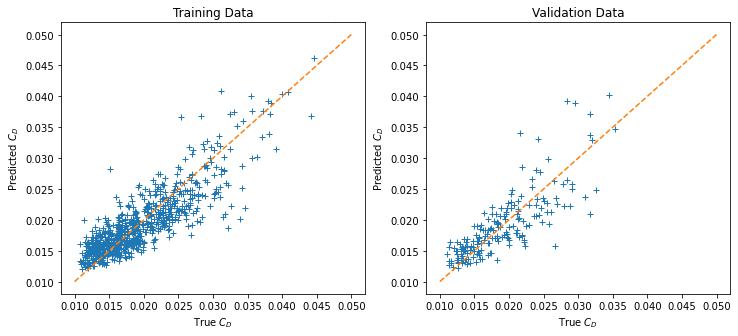

In [96]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)

y_pred = gp.predict(x_train)
#plt.plot(y_pred)
plt.plot(y_train, y_pred, '+')
plt.plot([0.01, 0.05], [0.01, 0.05], "--")

#plt.gca().set_xlim([0.008, 0.042])
#plt.gca().set_ylim([0.008, 0.042])
ax1 = plt.gca()
ax1.set_ylabel("Predicted $C_D$")
ax1.set_xlabel("True $C_D$")
ax1.set_title("Training Data")

plt.subplot(1, 2, 2)

y_pred = gp.predict(x_test)
#plt.plot(y_pred)
plt.plot(y_test, y_pred, '+', label="asd")
plt.plot([0.01, 0.05], [0.01, 0.05], "--")
#plt.plot(y_pred, 'o', c="r")
ax1.set_xlim(plt.gca().get_xlim())
ax1.set_ylim(plt.gca().get_ylim())
ax2 = plt.gca()
ax2.set_ylabel("Predicted $C_D$")
ax2.set_xlabel("True $C_D$")
ax2.set_title("Validation Data")